In [1]:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import cftime
import pandas as pd

In [2]:
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

In [3]:
data_dir='/data/shareddata/Climatologias/RG_ArgoClim/NC/'

In [4]:
# Load anomaly data until 2019 and the mean T and S
fileSalt2019 = data_dir+'RG_ArgoClim_Salinity_2019.nc'
fileTemp2019 = data_dir+'RG_ArgoClim_Temperature_2019.nc'

XrTemp2019 = xr.open_dataset(fileTemp2019, decode_times=False)
XrSalt2019 = xr.open_dataset(fileSalt2019, decode_times=False)

In [5]:
XrTemp2019

<xarray.Dataset> Size: 2GB
Dimensions:                   (LONGITUDE: 360, LATITUDE: 145, PRESSURE: 58,
                               TIME: 180)
Coordinates:
  * LONGITUDE                 (LONGITUDE) float32 1kB 20.5 21.5 ... 378.5 379.5
  * LATITUDE                  (LATITUDE) float32 580B -64.5 -63.5 ... 78.5 79.5
  * PRESSURE                  (PRESSURE) float32 232B 2.5 10.0 ... 1.975e+03
  * TIME                      (TIME) float32 720B 0.5 1.5 2.5 ... 178.5 179.5
Data variables:
    ARGO_TEMPERATURE_MEAN     (PRESSURE, LATITUDE, LONGITUDE) float32 12MB ...
    ARGO_TEMPERATURE_ANOMALY  (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 2GB ...
    BATHYMETRY_MASK           (PRESSURE, LATITUDE, LONGITUDE) float32 12MB ...
    MAPPING_MASK              (PRESSURE, LATITUDE, LONGITUDE) float32 12MB ...

In [7]:
T_mean = XrTemp2019.ARGO_TEMPERATURE_MEAN
S_mean = XrSalt2019.ARGO_SALINITY_MEAN

T0_anom = XrTemp2019.ARGO_TEMPERATURE_ANOMALY
S0_anom = XrSalt2019.ARGO_SALINITY_ANOMALY

In [8]:
files = []
for iy in range(2019,2024):
    for im in range(1,13):
        files.append(data_dir+"RG_ArgoClim_%04d%02d_2019.nc"%(iy,im))

In [9]:
iy = 2024
for im in range(1,4):
    files.append(data_dir+"RG_ArgoClim_%04d%02d_2019.nc"%(iy,im))

In [10]:
data = xr.open_mfdataset(files, decode_times=False)

In [11]:
T1_anom = data.ARGO_TEMPERATURE_ANOMALY
S1_anom = data.ARGO_SALINITY_ANOMALY

In [12]:
T_anom=xr.concat([T0_anom,T1_anom],dim='TIME')
S_anom=xr.concat([S0_anom,S1_anom],dim='TIME')

In [13]:
T=T_anom+T_mean
S=S_anom+S_mean

In [14]:
T

<xarray.DataArray (TIME: 243, PRESSURE: 58, LATITUDE: 145, LONGITUDE: 360)> Size: 3GB
dask.array<add, shape=(243, 58, 145, 360), dtype=float32, chunksize=(83, 58, 83, 83), chunktype=numpy.ndarray>
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 1kB 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * LATITUDE   (LATITUDE) float32 580B -64.5 -63.5 -62.5 ... 77.5 78.5 79.5
  * PRESSURE   (PRESSURE) float32 232B 2.5 10.0 20.0 ... 1.9e+03 1.975e+03
  * TIME       (TIME) float32 972B 0.5 1.5 2.5 3.5 ... 239.5 240.5 241.5 242.5

243

In [18]:
time = pd.date_range(start="2004-01-01", periods=T.shape[0],freq='MS')+pd.DateOffset(days=14)

In [19]:
temperature=T.values
salinity=S.values
lon=T.LONGITUDE.values
lat=T.LATITUDE.values
pre=T.PRESSURE.values
time = pd.date_range(start="2004-01-01", periods=T.shape[0],freq='MS')+pd.DateOffset(days=14)
reference_time = pd.Timestamp("2004-04-01")

In [54]:
RG = xr.Dataset(
    data_vars=dict(
        temperature=(["time","pre","lat","lon"], temperature),
        salinity=(["time","pre","lat","lon"], salinity),
    ),
    coords=dict(
        lon=(["lon"], lon),
        lat=(["lat"], lat),
        pre=(["pre"], pre),
        time=time,
    ),
    attrs=dict(description="Roemmich-Gilson Argo Climatology"),
)

In [56]:
RG = RG.interp(pre=np.arange(2.5,1980,10), method="linear")

In [58]:
RG.pre

<xarray.DataArray 'pre' (pre: 198)> Size: 2kB
array([   2.5,   12.5,   22.5,   32.5,   42.5,   52.5,   62.5,   72.5,   82.5,
         92.5,  102.5,  112.5,  122.5,  132.5,  142.5,  152.5,  162.5,  172.5,
        182.5,  192.5,  202.5,  212.5,  222.5,  232.5,  242.5,  252.5,  262.5,
        272.5,  282.5,  292.5,  302.5,  312.5,  322.5,  332.5,  342.5,  352.5,
        362.5,  372.5,  382.5,  392.5,  402.5,  412.5,  422.5,  432.5,  442.5,
        452.5,  462.5,  472.5,  482.5,  492.5,  502.5,  512.5,  522.5,  532.5,
        542.5,  552.5,  562.5,  572.5,  582.5,  592.5,  602.5,  612.5,  622.5,
        632.5,  642.5,  652.5,  662.5,  672.5,  682.5,  692.5,  702.5,  712.5,
        722.5,  732.5,  742.5,  752.5,  762.5,  772.5,  782.5,  792.5,  802.5,
        812.5,  822.5,  832.5,  842.5,  852.5,  862.5,  872.5,  882.5,  892.5,
        902.5,  912.5,  922.5,  932.5,  942.5,  952.5,  962.5,  972.5,  982.5,
        992.5, 1002.5, 1012.5, 1022.5, 1032.5, 1042.5, 1052.5, 1062.5, 1072.5,
       1082.5, 1092.5, 1102.5, 1112.5, 1122.5, 1132.5, 1142.5, 1152.5, 1162.5,
       1172.5, 1182.5, 1192.5, 1202.5, 1212.5, 1222.5, 1232.5, 1242.5, 1252.5,
       1262.5, 1272.5, 1282.5, 1292.5, 1302.5, 1312.5, 1322.5, 1332.5, 1342.5,
       1352.5, 1362.5, 1372.5, 1382.5, 1392.5, 1402.5, 1412.5, 1422.5, 1432.5,
       1442.5, 1452.5, 1462.5, 1472.5, 1482.5, 1492.5, 1502.5, 1512.5, 1522.5,
       1532.5, 1542.5, 1552.5, 1562.5, 1572.5, 1582.5, 1592.5, 1602.5, 1612.5,
       1622.5, 1632.5, 1642.5, 1652.5, 1662.5, 1672.5, 1682.5, 1692.5, 1702.5,
       1712.5, 1722.5, 1732.5, 1742.5, 1752.5, 1762.5, 1772.5, 1782.5, 1792.5,
       1802.5, 1812.5, 1822.5, 1832.5, 1842.5, 1852.5, 1862.5, 1872.5, 1882.5,
       1892.5, 1902.5, 1912.5, 1922.5, 1932.5, 1942.5, 1952.5, 1962.5, 1972.5])
Coordinates:
  * pre      (pre) float64 2kB 2.5 12.5 22.5 ... 1.952e+03 1.962e+03 1.972e+03

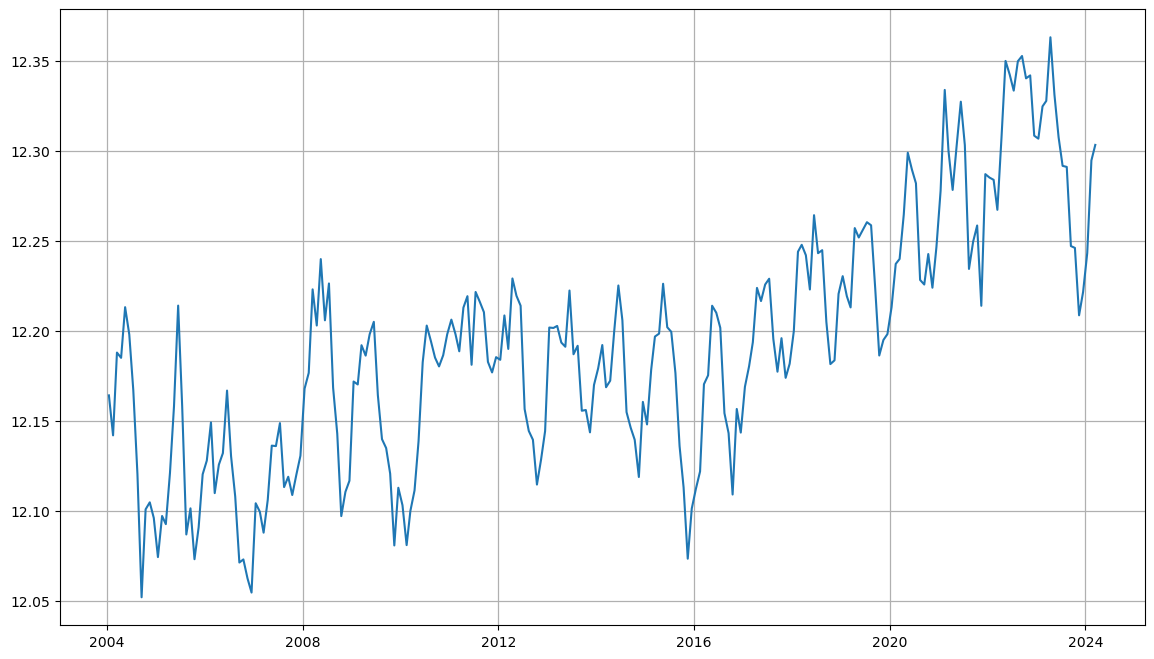

In [60]:
fig, ax = plt.subplots(1 , 1 , figsize = (14,8))
ax.plot(RG.time,
        RG.temperature.sel(lat=slice( -60, 60)).mean(dim='lat').mean(dim='lon').sel(pre=200, method='nearest'),
        label = '200')
ax.grid(linestyle='-', linewidth=.9);

In [62]:
RG.to_netcdf('./Data/RG_Global_'+str(RG.time[0].dt.strftime('%Y-%m').values)+'_'+str(RG.time[-1].dt.strftime('%Y-%m').values)+'.nc')